# Import modules 

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
#import xgboost as xgb

# Implementing metrics

## Mean Squared Error
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [2]:
# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Root Mean Squared Error
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Mean Absolute Error
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

In [4]:
# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

## Relative Absolute Error
$$RSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [5]:
# Relative Absolute Error
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

## Residual Standard Error
$$RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|}$$

In [6]:
# Residual Standard Error
def residual_standard_error(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    degrees_of_freedom = len(y_true) - 2
    return np.sqrt(residual_sum_of_squares / degrees_of_freedom)

## Mean absolute percentage error
$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$$

In [7]:
# Mean absolute percentage error
def mean_absolute_percentage_error(y, y_hat):
    mape = np.mean(np.abs((y - y_hat) / y)) * 100
    return mape

## correlation coefficient
$$R = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

In [8]:
# correlation coefficient
def correlation_coefficient(y, y_hat):
    y_mean = np.mean(y)
    y_hat_mean = np.mean(y_hat)
    numerator = np.sum((y - y_mean) * (y_hat - y_hat_mean))
    denominator = np.sqrt(np.sum((y - y_mean) ** 2) * np.sum((y_hat - y_hat_mean) ** 2))
    r = numerator / denominator
    return r

## R-squared
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [9]:
# R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Load data from Yahoo Finance API 

In [10]:
sbux_data = yf.download('SBUX', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [11]:
sbux_data.drop(columns=['Adj Close'], inplace=True)
sbux_data.reset_index(inplace=True)
sbux_data.head()

,Date,Open,High,Low,Close,Volume
0,2019-06-03,76.120003,76.529999,75.650002,76.220001,8122200
1,2019-06-04,76.769997,78.760002,76.660004,78.519997,11685000
2,2019-06-05,78.790001,79.970001,78.660004,79.959999,7437100
3,2019-06-06,80.029999,81.629997,79.900002,81.400002,10457200
4,2019-06-07,81.599998,83.330002,81.510002,82.480003,11278800


In [12]:
sbux_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


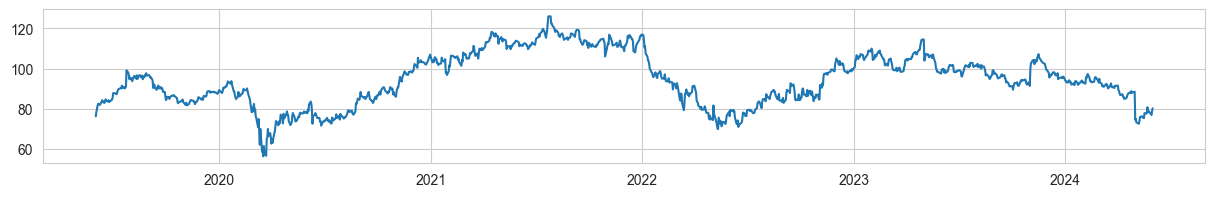

In [13]:
plt.figure(figsize=(15,2))
plt.plot(sbux_data['Date'], sbux_data['Close'])

In [14]:
sbux_data[(sbux_data['Date'].dt.strftime('%Y') == '2023')]

,Date,Open,High,Low,Close,Volume
904,2023-01-03,100.559998,101.169998,99.470001,100.830002,6607700
905,2023-01-04,102.690002,104.730003,102.550003,104.459999,8166600
906,2023-01-05,104.489998,105.099998,103.489998,104.430000,5575100
907,2023-01-06,105.379997,107.000000,105.010002,106.690002,9644100
908,2023-01-09,106.519997,106.680000,104.430000,104.739998,10124800
...,...,...,...,...,...,...
1149,2023-12-22,94.889999,95.830002,94.339996,95.279999,6360400
1150,2023-12-26,95.339996,95.690002,94.959999,95.669998,3709500
1151,2023-12-27,95.690002,95.779999,94.790001,95.290001,4959300
1152,2023-12-28,95.500000,95.970001,95.110001,95.930000,4518300


In [15]:
X_train =  sbux_data[(sbux_data['Date'].dt.strftime('%Y') >= '2019') & (sbux_data['Date'].dt.strftime('%Y') < '2023')].copy()
X_test =  sbux_data[sbux_data['Date'].dt.strftime('%Y') >= '2023'].copy()

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

print(X_train.shape, X_test.shape)

(904, 6) (355, 6)


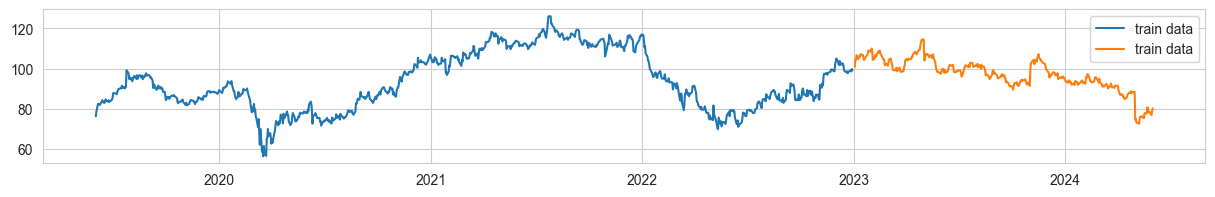

In [16]:
plt.figure(figsize=(15,2))
plt.plot(X_train['Date'], X_train['Close'], label='train data')
plt.plot(X_test['Date'], X_test['Close'], label='train data')
plt.legend(loc='best')

In [17]:
X_train

,Date,Open,High,Low,Close,Volume
0,2019-06-03,76.120003,76.529999,75.650002,76.220001,8122200
1,2019-06-04,76.769997,78.760002,76.660004,78.519997,11685000
2,2019-06-05,78.790001,79.970001,78.660004,79.959999,7437100
3,2019-06-06,80.029999,81.629997,79.900002,81.400002,10457200
4,2019-06-07,81.599998,83.330002,81.510002,82.480003,11278800
...,...,...,...,...,...,...
899,2022-12-23,97.589996,98.300003,96.879997,98.269997,3944500
900,2022-12-27,98.570000,99.459999,98.209999,99.199997,4402500
901,2022-12-28,99.410004,99.910004,98.389999,98.599998,3491500
902,2022-12-29,99.000000,100.650002,98.669998,99.769997,3976100


# Make data chunks

## Example of index of data chunks

In [18]:
end_value = X_test.shape[0]
window_size = 7
padding = 1

chunks = []
labels = []
for start in tqdm(range(0, ((end_value-window_size)+1)-1, padding), desc='Making chunks for each word thought'):
    end = start + window_size
    
    #With those limits index create the windows
    chunks.append([start, end])
    labels.append(end+1)
        
print(chunks, len(chunks))
print(labels, len(labels))

Making chunks for each word thought: 100%|██████████| 348/348 [00:00<?, ?it/s]

[[0, 7], [1, 8], [2, 9], [3, 10], [4, 11], [5, 12], [6, 13], [7, 14], [8, 15], [9, 16], [10, 17], [11, 18], [12, 19], [13, 20], [14, 21], [15, 22], [16, 23], [17, 24], [18, 25], [19, 26], [20, 27], [21, 28], [22, 29], [23, 30], [24, 31], [25, 32], [26, 33], [27, 34], [28, 35], [29, 36], [30, 37], [31, 38], [32, 39], [33, 40], [34, 41], [35, 42], [36, 43], [37, 44], [38, 45], [39, 46], [40, 47], [41, 48], [42, 49], [43, 50], [44, 51], [45, 52], [46, 53], [47, 54], [48, 55], [49, 56], [50, 57], [51, 58], [52, 59], [53, 60], [54, 61], [55, 62], [56, 63], [57, 64], [58, 65], [59, 66], [60, 67], [61, 68], [62, 69], [63, 70], [64, 71], [65, 72], [66, 73], [67, 74], [68, 75], [69, 76], [70, 77], [71, 78], [72, 79], [73, 80], [74, 81], [75, 82], [76, 83], [77, 84], [78, 85], [79, 86], [80, 87], [81, 88], [82, 89], [83, 90], [84, 91], [85, 92], [86, 93], [87, 94], [88, 95], [89, 96], [90, 97], [91, 98], [92, 99], [93, 100], [94, 101], [95, 102], [96, 103], [97, 104], [98, 105], [99, 106], [100,

In [19]:
X_train

,Date,Open,High,Low,Close,Volume
0,2019-06-03,76.120003,76.529999,75.650002,76.220001,8122200
1,2019-06-04,76.769997,78.760002,76.660004,78.519997,11685000
2,2019-06-05,78.790001,79.970001,78.660004,79.959999,7437100
3,2019-06-06,80.029999,81.629997,79.900002,81.400002,10457200
4,2019-06-07,81.599998,83.330002,81.510002,82.480003,11278800
...,...,...,...,...,...,...
899,2022-12-23,97.589996,98.300003,96.879997,98.269997,3944500
900,2022-12-27,98.570000,99.459999,98.209999,99.199997,4402500
901,2022-12-28,99.410004,99.910004,98.389999,98.599998,3491500
902,2022-12-29,99.000000,100.650002,98.669998,99.769997,3976100


In [20]:
def split_data_into_chunks(data, window_size = 7, offset = 1):
    end_value = data.shape[0]
    
    date = data['Date']
    data.drop(columns=['Date'], inplace=True)
    
    chunks = []
    labels = []
    date_7_days = []
    for start in tqdm(range(0, ((end_value-window_size)+1)-2, offset), desc='Making chunks'):
        end = start + window_size
        
        #With those limits index create the windows
        chunks.append(data[start:end])
        labels.append(data['Close'][end+1])
        date_7_days.append(date[start])
    #return  np.array(chunks).transpose(0,2,1), np.array(labels)
    return  np.array(chunks), np.array(labels), date_7_days

In [21]:
X_train_chunk, y_train, date_train = split_data_into_chunks(X_train.copy(), window_size = 7, offset = 1)
X_test_chunk, y_test, date_test = split_data_into_chunks(X_test.copy(), window_size = 7, offset = 1)

Making chunks: 100%|██████████| 347/347 [00:00<00:00, 6690.80it/s]


In [22]:
print(X_train_chunk.shape, y_train.shape, len(date_train))
print(X_test_chunk.shape, y_test.shape, len(date_test))

(896, 7, 5) (896,) 896
(347, 7, 5) (347,) 347


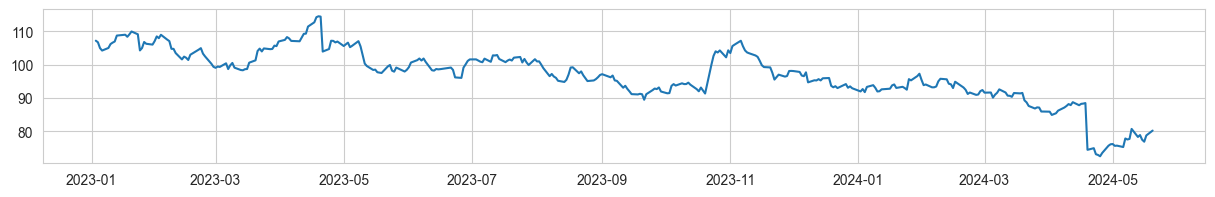

In [23]:
plt.figure(figsize=(15,2))
plt.plot(date_test, y_test)

In [24]:
regressors = {#'LinearReg' : LinearRegression(),
              'RandomForestReg' : RandomForestRegressor(n_estimators = 1000),
              'GradientBoostingReg' : GradientBoostingRegressor(),
              'ExtraTreesReg' : ExtraTreesRegressor(n_estimators=1000),
              #'MLPReg' : MLPRegressor(hidden_layer_sizes=(500,), max_iter=1000, learning_rate_init=0.001),
              #'XGBReg' : xgb.XGBRegressor(n_estimators = 1000,),
              }

# Standardize data with StandardScaler

In [25]:
metrics = {'Regressors' : regressors.keys(),
           'MSE' : [],
           'RMSE' : [],
           'MAE' : [],
           'RSE' : [],
           #'MAPE' : [],
           'RAE' : [],
           'R' : [],
           'R2' : [],
           }
labels_per_regressor = {}



for regressor_name, regressor in tqdm(regressors.items()):
    #Flatten data
    X_train_flatten = X_train_chunk.reshape(X_train_chunk.shape[0], -1, order = 'C')
    X_test_flatten = X_test_chunk.reshape(X_test_chunk.shape[0], -1, order = 'C')
    
    scaler = StandardScaler()
    X_train_flatten = scaler.fit_transform(X_train_flatten)
    X_test_flatten = scaler.fit_transform(X_test_flatten)
    
    #train the regresor model
    regressor.fit(X_train_flatten, y_train)
    #make predictions
    labels_pred = regressor.predict(X_test_flatten)
    #store those predictions on the dictionary using the current regressor model name as the key
    labels_per_regressor[regressor_name] = labels_pred
    
    #calculate and store metrics for actual labels values vs the predicted ones, also round the value to avoid several decimals
    metrics['MSE'].append(np.round(mean_squared_error(y_test, labels_pred), 4))
    metrics['RMSE'].append(np.round(rmse(y_test, labels_pred), 4))
    metrics['MAE'].append(np.round(mean_absolute_error(y_test, labels_pred), 4))
    metrics['RSE'].append(np.round(residual_standard_error(y_test, labels_pred), 4))
    #metrics['MAPE'].append(np.round(mean_absolute_percentage_error(y_test, labels_pred), 4))
    metrics['RAE'].append(np.round(relative_absolute_error(y_test, labels_pred), 4))
    metrics['R'].append(np.round(correlation_coefficient(y_test, labels_pred), 4))
    metrics['R2'].append(np.round(r_squared(y_test, labels_pred), 4))

100%|██████████| 3/3 [01:02<00:00, 20.99s/it]


In [26]:
labels_per_regressor

{'RandomForestReg': array([111.22234978, 111.25940958, 113.62139046, 111.98593965,
        109.65020942, 108.11438988, 108.30606976, 110.54226897,
        109.96648897, 111.24062927, 114.31878995, 114.76935977,
        113.32135998, 115.2043299 , 115.3349698 , 114.86419015,
        108.33471952, 108.00721973, 110.79788034, 111.12344984,
        110.5752491 , 113.3210701 , 113.16886008, 113.72081989,
        114.82197995, 113.94509034, 112.86163042, 109.09312956,
        108.80511978, 107.61829014, 101.70561128, 102.21724108,
        102.67410042, 102.62129035, 103.82992036, 105.71205125,
        107.2676295 , 106.09384052, 101.53877095,  99.86196077,
         98.57126008,  98.18482969,  98.87112974,  96.8707995 ,
         98.04523952,  96.3013397 ,  97.81739963,  98.7023    ,
         97.81453937,  96.8128492 ,  95.68751952,  96.59290954,
         95.64676928,  97.57208932, 101.91296091, 103.73986111,
        105.45044088, 105.25146105, 106.04387033, 106.07373059,
        105.22232072,

In [27]:
metrics.items()

dict_items([('Regressors', dict_keys(['RandomForestReg', 'GradientBoostingReg', 'ExtraTreesReg'])), ('MSE', [44.3033, 45.0349, 43.0417]), ('RMSE', [6.6561, 6.7108, 6.5606]), ('MAE', [5.4659, 5.4882, 5.3913]), ('RSE', [6.6753, 6.7302, 6.5796]), ('RAE', [0.8892, 0.8928, 0.877]), ('R', [0.9552, 0.9567, 0.9538]), ('R2', [0.3079, 0.2965, 0.3276])])

In [28]:
regressors.keys()

dict_keys(['RandomForestReg', 'GradientBoostingReg', 'ExtraTreesReg'])

In [29]:
#metrics['Regressors'] = regressors.keys() 
pd.DataFrame(metrics)

,Regressors,MSE,RMSE,MAE,RSE,RAE,R,R2
0,RandomForestReg,44.3033,6.6561,5.4659,6.6753,0.8892,0.9552,0.3079
1,GradientBoostingReg,45.0349,6.7108,5.4882,6.7302,0.8928,0.9567,0.2965
2,ExtraTreesReg,43.0417,6.5606,5.3913,6.5796,0.8770,0.9538,0.3276


In [30]:
metrics

{'Regressors': dict_keys(['RandomForestReg', 'GradientBoostingReg', 'ExtraTreesReg']),
 'MSE': [44.3033, 45.0349, 43.0417],
 'RMSE': [6.6561, 6.7108, 6.5606],
 'MAE': [5.4659, 5.4882, 5.3913],
 'RSE': [6.6753, 6.7302, 6.5796],
 'RAE': [0.8892, 0.8928, 0.877],
 'R': [0.9552, 0.9567, 0.9538],
 'R2': [0.3079, 0.2965, 0.3276]}

100%|██████████| 3/3 [00:00<00:00, 1504.59it/s]


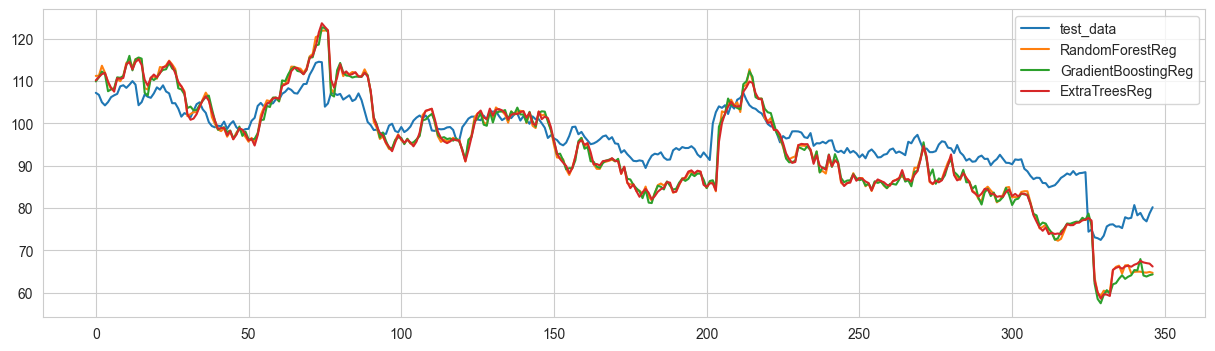

In [31]:
plt.figure(figsize=(15,4))
plt.plot(y_test, label = 'test_data')
for regressor_name, regressor in tqdm(regressors.items()):
 plt.plot(labels_per_regressor[regressor_name], label = regressor_name)
plt.legend(loc = 'best')
plt.show()

100%|██████████| 3/3 [00:00<00:00, 601.56it/s]


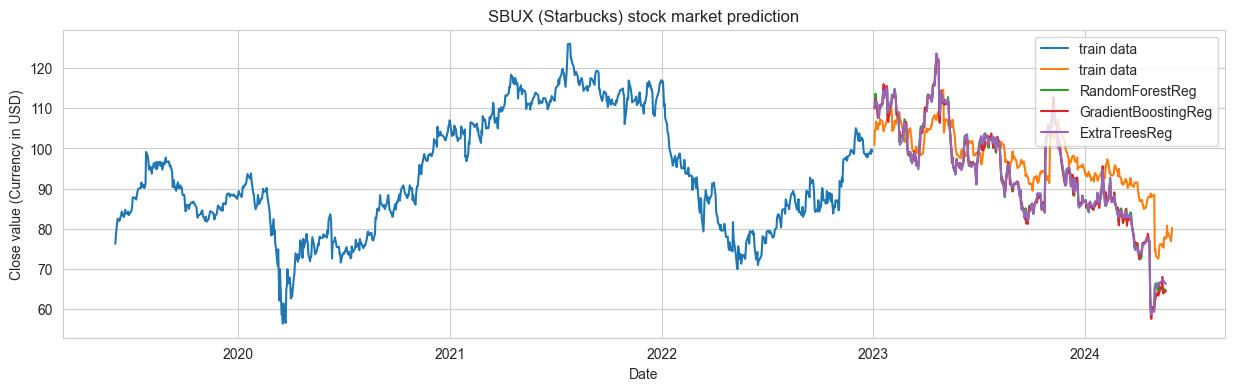

In [52]:
plt.figure(figsize=(15,4))


#plt.plot(sbux_data['Date'], sbux_data['Close'], label = 'train data')
#plt.plot(date_train[:], y_train[:], label='train data')
#plt.plot(date_test, y_test, label='test data')
plt.plot(X_train['Date'], X_train['Close'], label='train data')
plt.plot(X_test['Date'], X_test['Close'], label='train data')
for regressor_name, regressor in tqdm(regressors.items()):
    plt.plot(date_test, labels_per_regressor[regressor_name], label = regressor_name)
plt.legend(loc = 'upper right')
plt.title('SBUX (Starbucks) stock market prediction')
plt.xlabel('Date')
plt.ylabel('Close value (Currency in USD)')
plt.show()